## Task 2: Quantitative Analysis Using Pandas and NumPy

This task involves calculating technical indicators for stock price data without relying on external libraries like TA-Lib. Indicators include Simple Moving Average (SMA), Relative Strength Index (RSI), and Moving Average Convergence Divergence (MACD).


## Import Necessary Libraries
We use pandas for data manipulation, numpy for numerical calculations, matplotlib for visualizations, and os for file handling.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


## Define Paths for Data Files
Set up paths to all CSV files for the stock datasets. The files should contain columns like `Date`, `Open`, `High`, `Low`, `Close`, `Adj Close`, and `Volume`.


In [3]:
# Define folder path for stock data
data_folder = "../data"

# List of stock file names
stock_files = [
    "AAPL_historical_data.csv",
    "AMZN_historical_data.csv",
    "GOOG_historical_data.csv",
    "META_historical_data.csv",
    "MSFT_historical_data.csv",
    "NVDA_historical_data.csv",
    "TSLA_historical_data.csv",
]

# Create a dictionary with file paths for each stock
file_paths = {file.split("_")[0]: os.path.join(data_folder, file) for file in stock_files}


## Load and Clean Stock Data
Read each file into a pandas DataFrame, clean up irrelevant columns (`Dividends` and `Stock Splits`), and ensure proper date formatting.


In [4]:
# Dictionary to store cleaned data for each stock
stock_data = {}

# Load and clean stock data
for stock, path in file_paths.items():
    # Load data
    df = pd.read_csv(path)
    
    # Drop unnecessary columns
    if 'Dividends' in df.columns:
        df = df.drop(columns=['Dividends'])
    if 'Stock Splits' in df.columns:
        df = df.drop(columns=['Stock Splits'])
    
    # Ensure Date column is datetime
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    
    # Store cleaned DataFrame
    stock_data[stock] = df


## Calculate Technical Indicators
Manually compute Simple Moving Average (SMA), Relative Strength Index (RSI), and Moving Average Convergence Divergence (MACD) for each stock.


In [7]:
# Helper functions to calculate indicators
def calculate_sma(data, period):
    return data['Close'].rolling(window=period).mean()

def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(window=period).mean()
    avg_loss = pd.Series(loss).rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

def calculate_macd(data, short_period=12, long_period=26, signal_period=9):
    short_ema = data['Close'].ewm(span=short_period, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_period, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, signal


### 2. Process Each Stock Dataset
For each file:
1. Load and clean the data.
2. Calculate technical indicators (SMA, RSI, MACD).
3. Store the results in a dictionary for further use.


In [8]:
# Process and calculate indicators for each stock
for stock, path in file_paths.items():
    # Load data
    df = pd.read_csv(path)
    
    # Drop unnecessary columns
    if 'Dividends' in df.columns:
        df = df.drop(columns=['Dividends'])
    if 'Stock Splits' in df.columns:
        df = df.drop(columns=['Stock Splits'])
    
    # Ensure Date column is datetime
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    
    # Calculate indicators
    df['SMA_10'] = calculate_sma(df, 10)
    df['SMA_30'] = calculate_sma(df, 30)
    df['RSI'] = calculate_rsi(df)
    df['MACD'], df['Signal_Line'] = calculate_macd(df)
    
    # Store processed data
    stock_data[stock] = df


# Visualize indicators for each stock


Visualizing data for AAPL


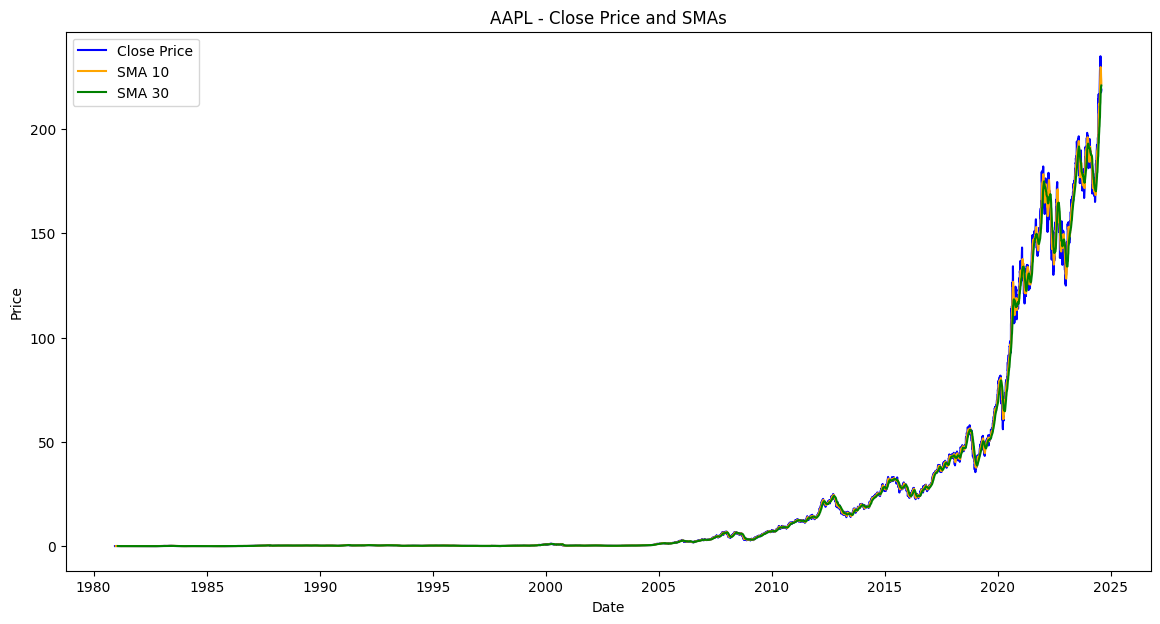

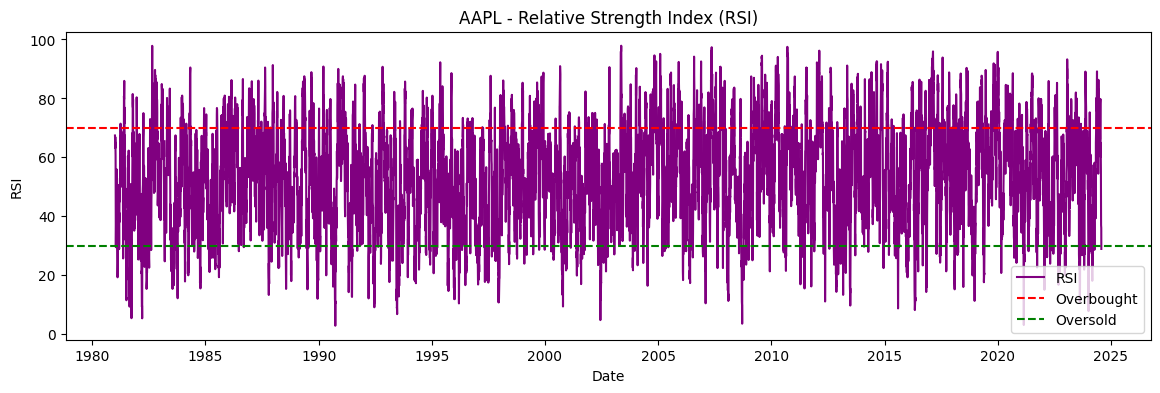

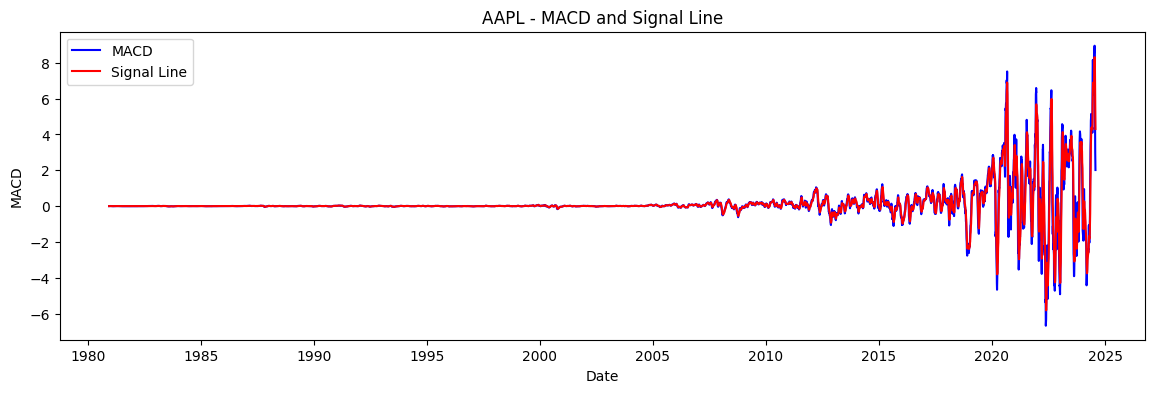

Visualizing data for AMZN


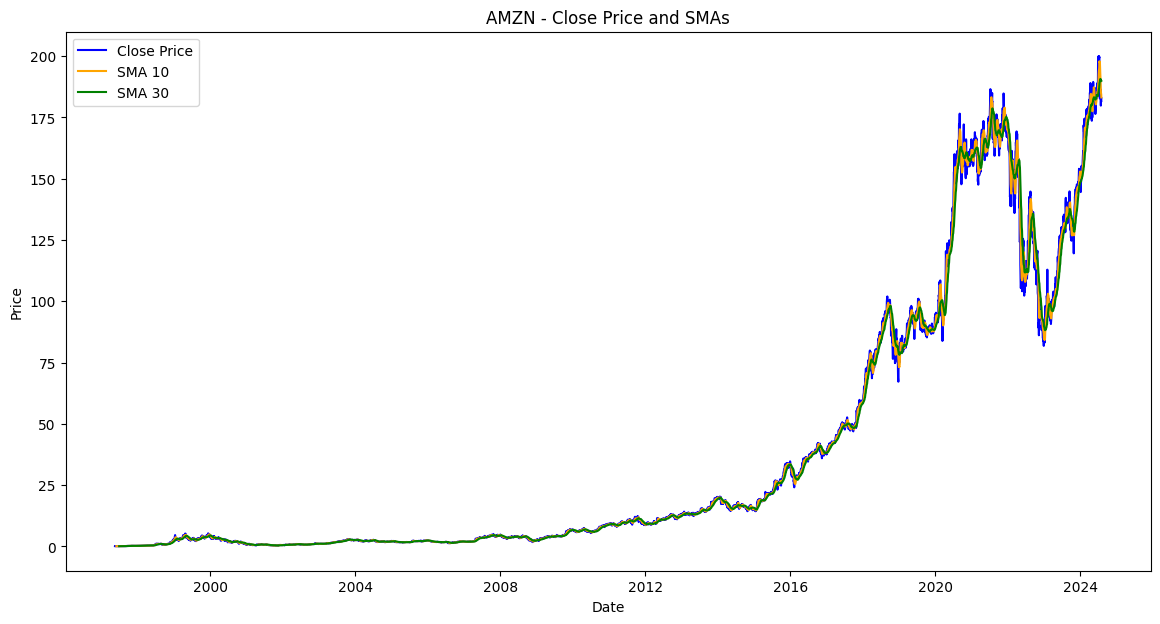

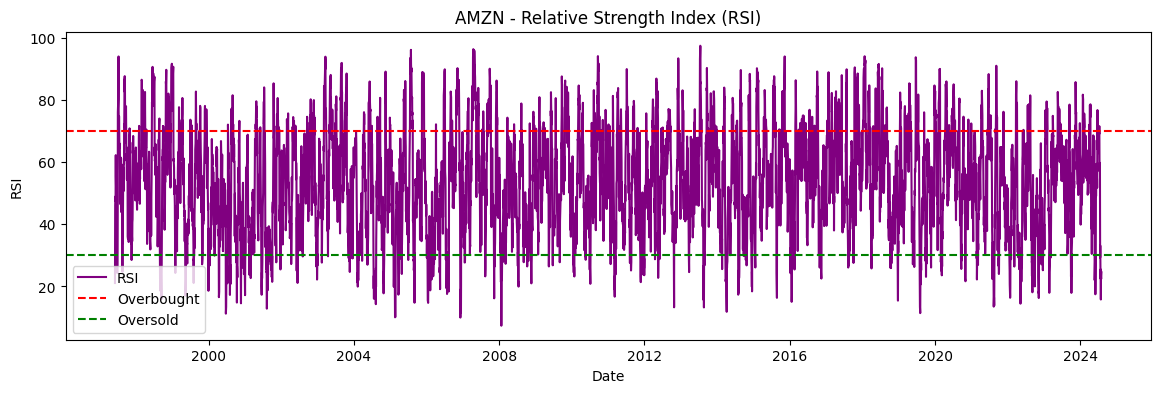

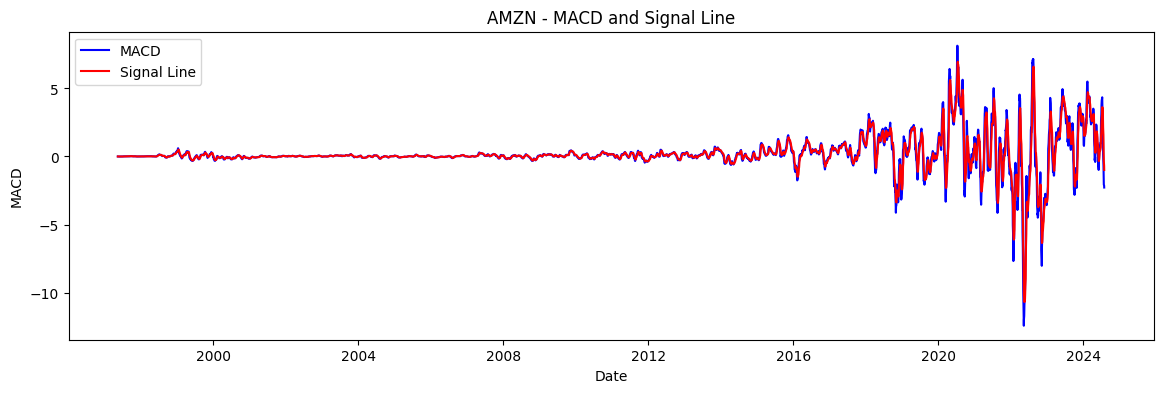

Visualizing data for GOOG


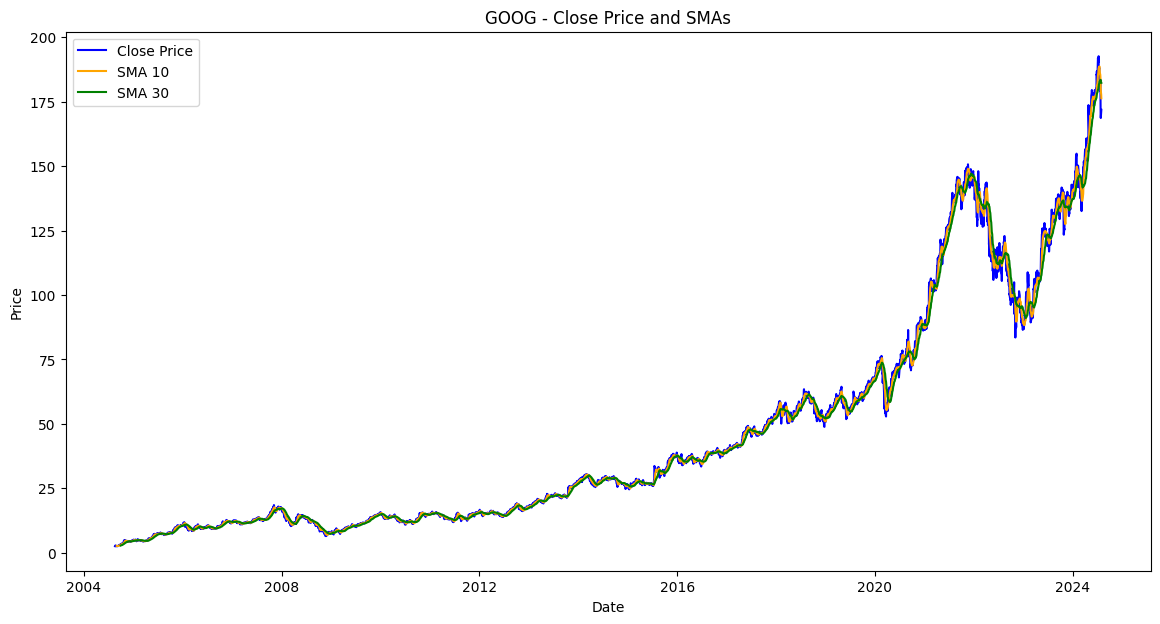

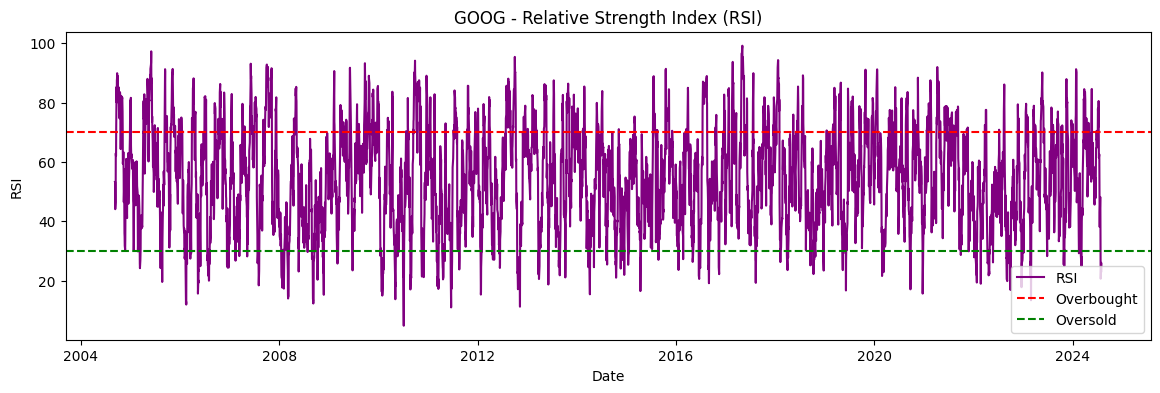

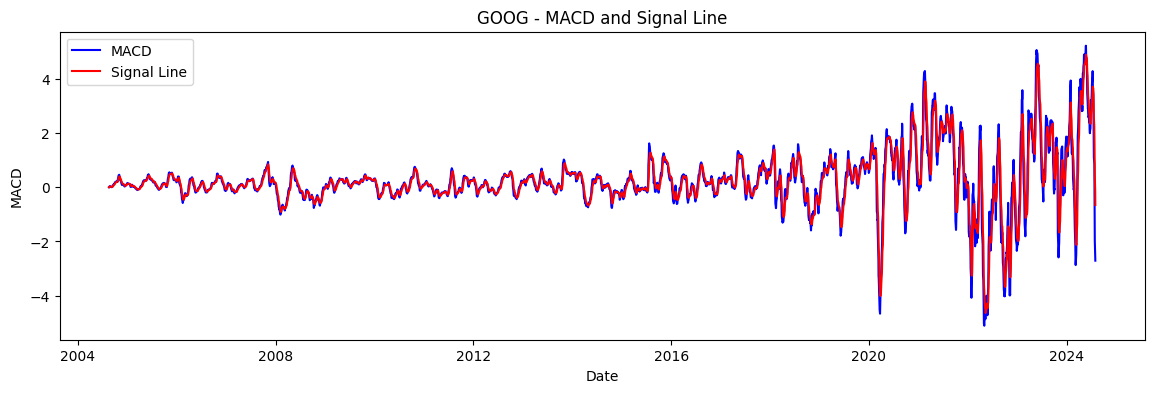

Visualizing data for META


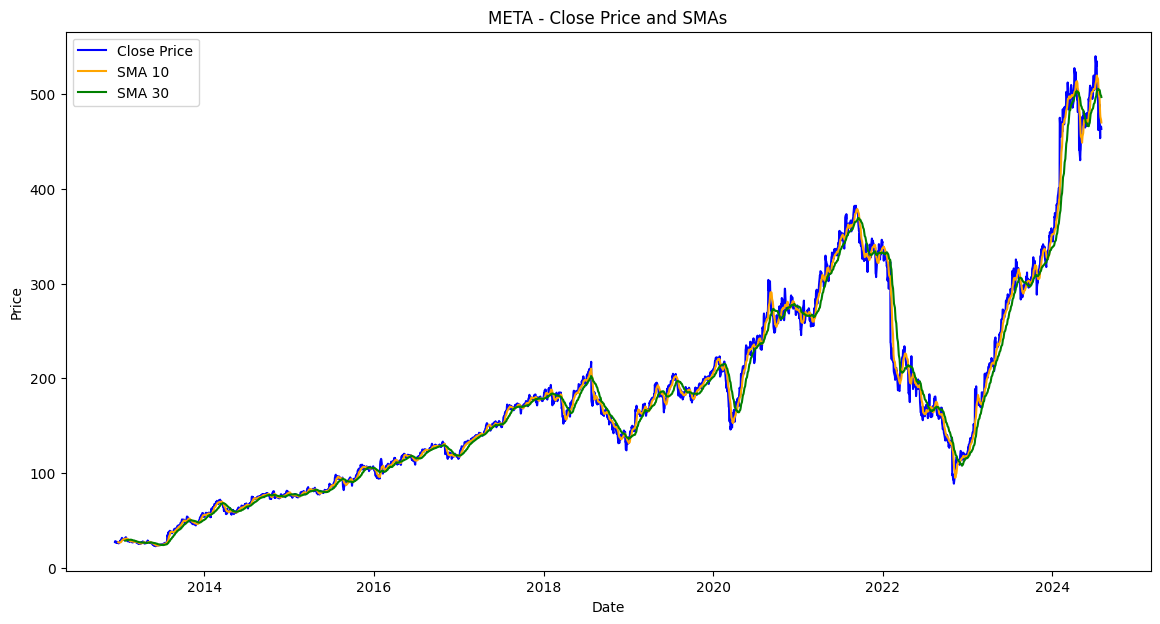

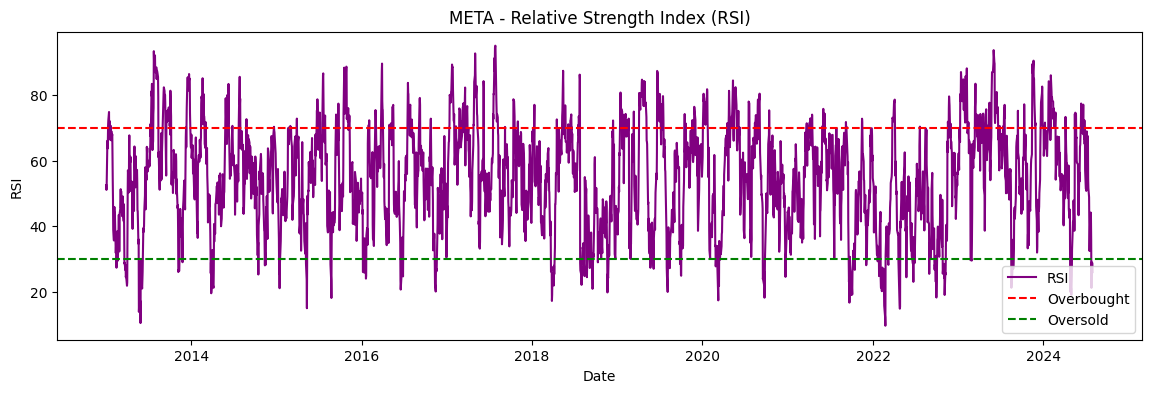

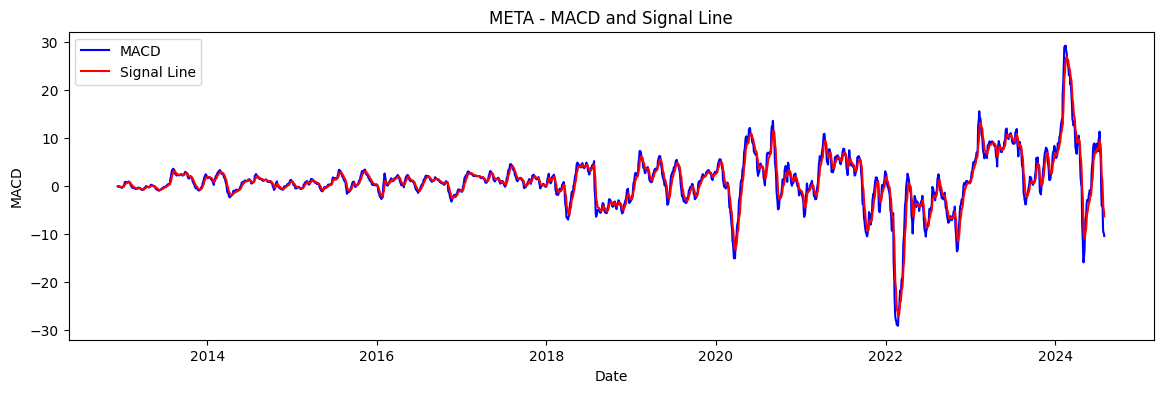

Visualizing data for MSFT


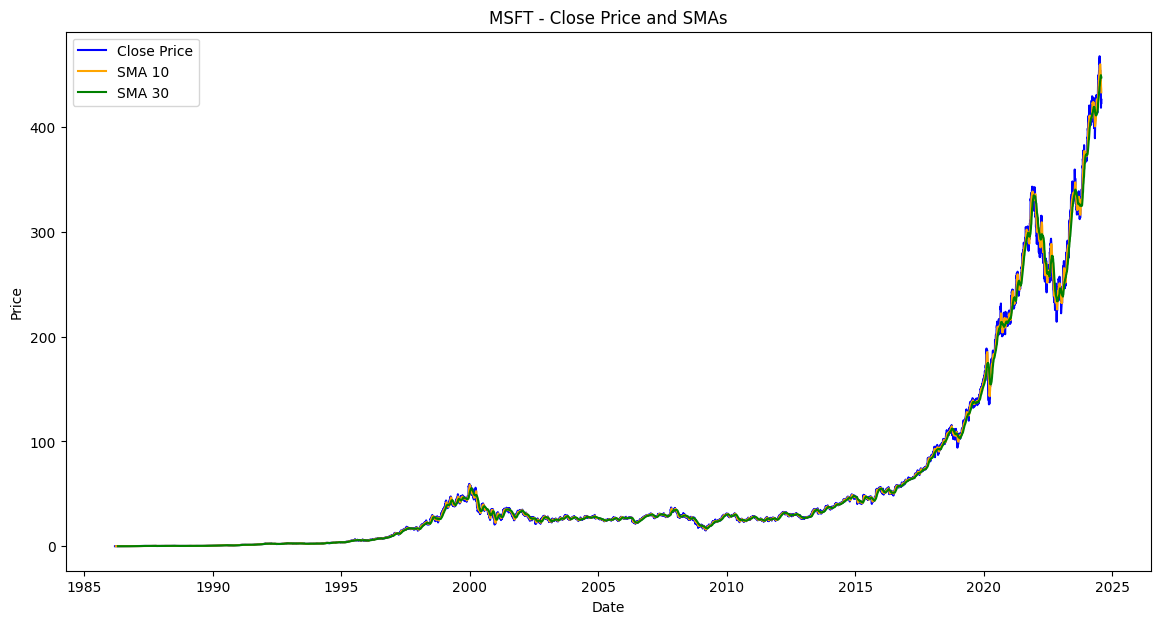

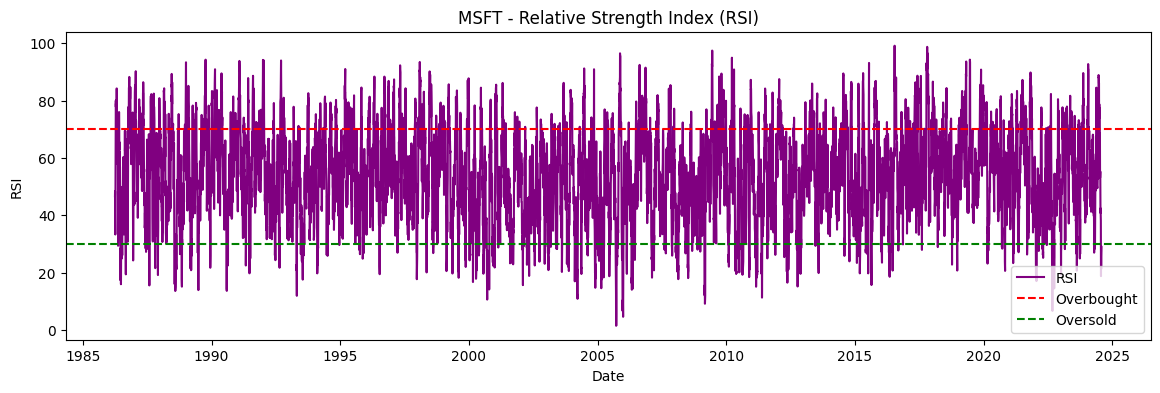

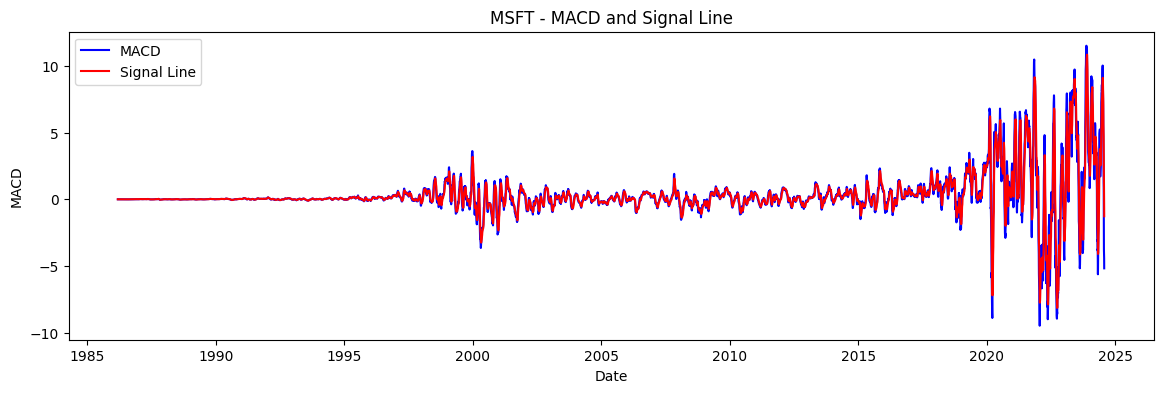

Visualizing data for NVDA


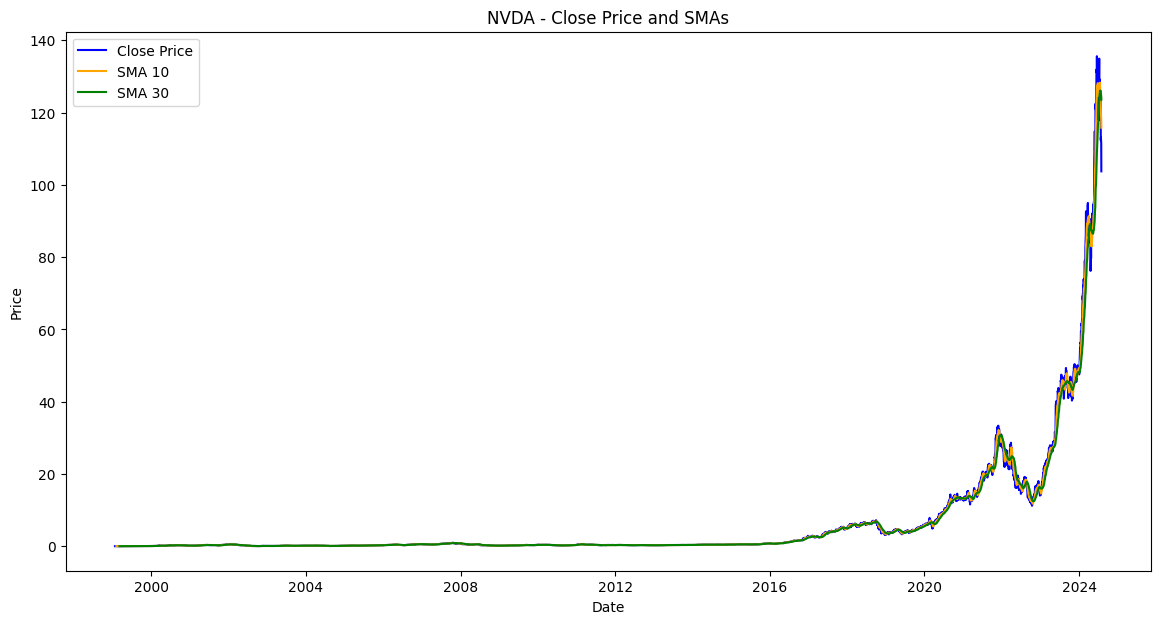

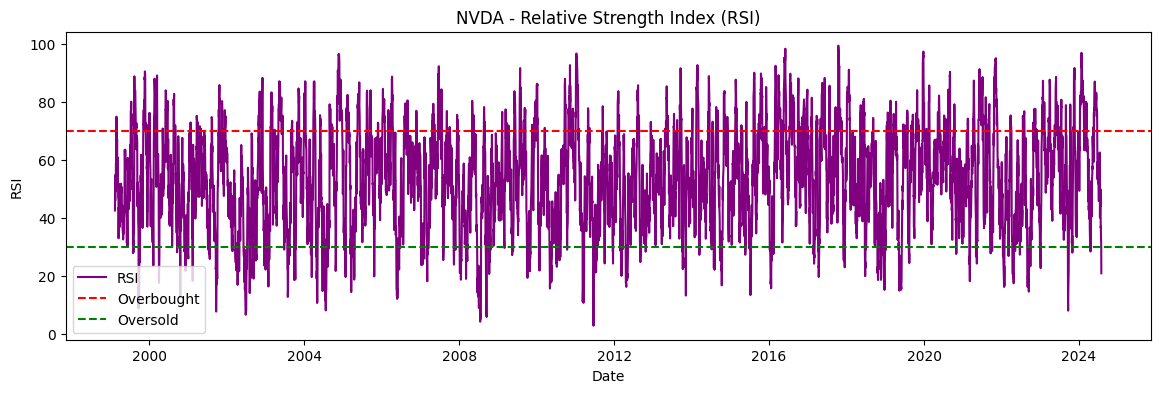

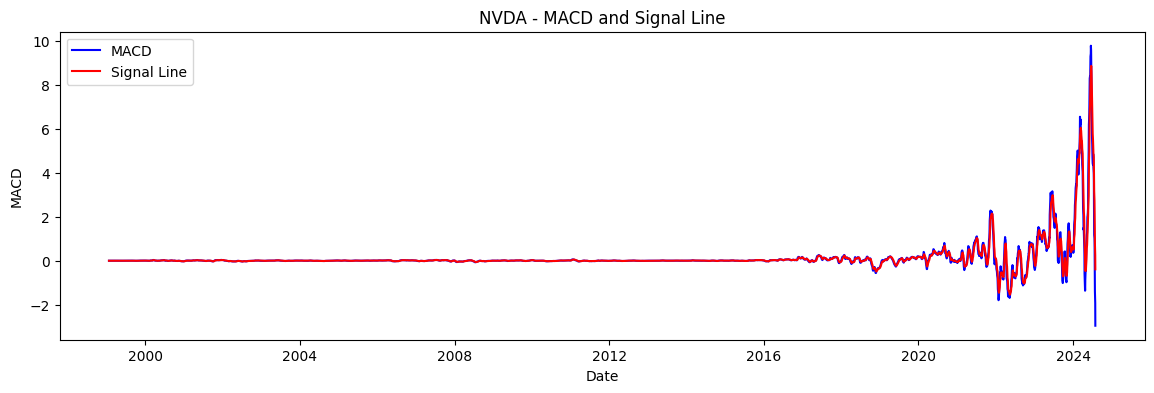

Visualizing data for TSLA


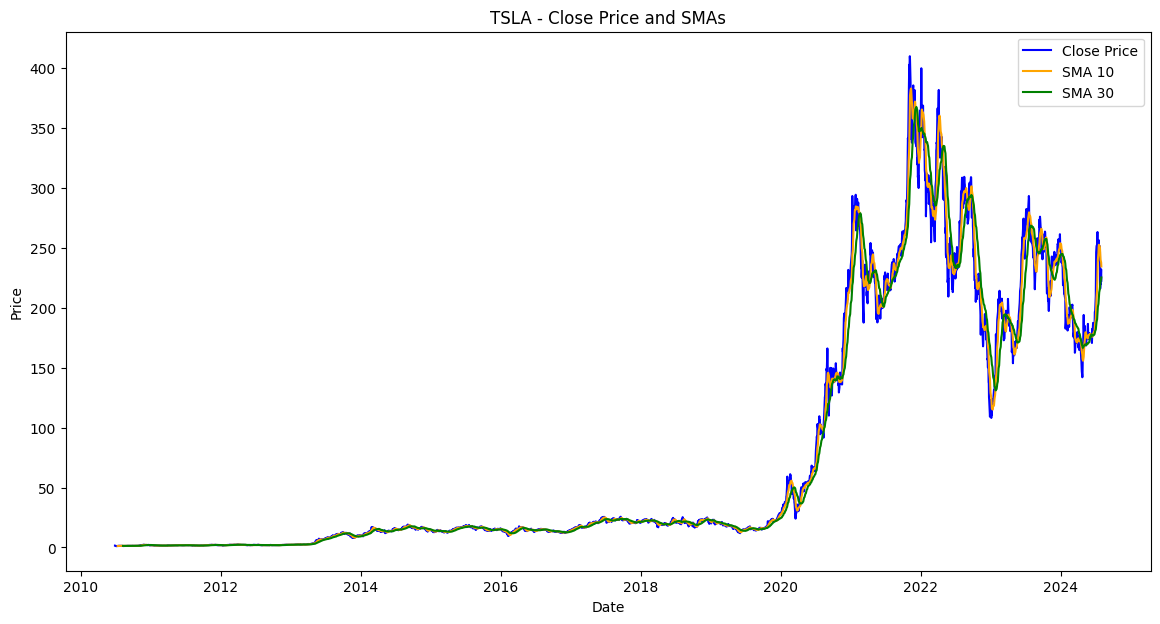

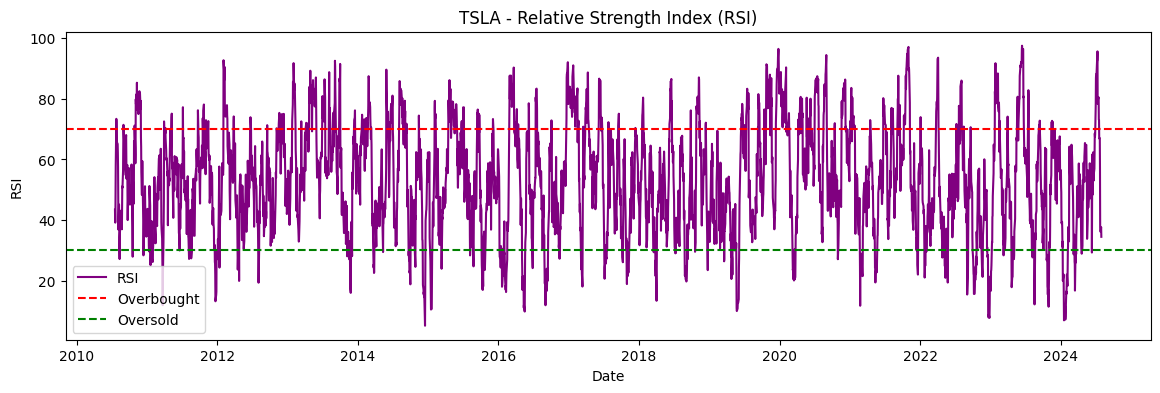

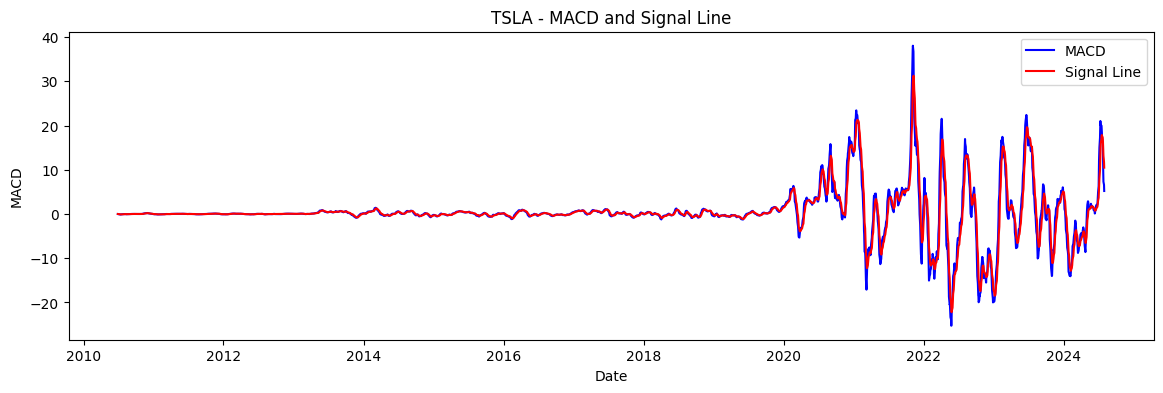

In [9]:
for stock, df in stock_data.items():
    print(f"Visualizing data for {stock}")
    
    # Plot Close price and SMAs
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
    plt.plot(df['Date'], df['SMA_10'], label='SMA 10', color='orange')
    plt.plot(df['Date'], df['SMA_30'], label='SMA 30', color='green')
    plt.title(f"{stock} - Close Price and SMAs")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()
    
    # Plot RSI
    plt.figure(figsize=(14, 4))
    plt.plot(df['Date'], df['RSI'], label='RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought')
    plt.axhline(30, color='green', linestyle='--', label='Oversold')
    plt.title(f"{stock} - Relative Strength Index (RSI)")
    plt.xlabel("Date")
    plt.ylabel("RSI")
    plt.legend()
    plt.show()
    
    # Plot MACD
    plt.figure(figsize=(14, 4))
    plt.plot(df['Date'], df['MACD'], label='MACD', color='blue')
    plt.plot(df['Date'], df['Signal_Line'], label='Signal Line', color='red')
    plt.title(f"{stock} - MACD and Signal Line")
    plt.xlabel("Date")
    plt.ylabel("MACD")
    plt.legend()
    plt.show()
